In [1]:
import json
def get_acc_list(file_path: str, users: int) -> list:
    acc_list = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    acc_lines = lines[-users:]
    print(acc_lines)
    for line in acc_lines:
        line = line.replace('\'', '"')  # 替换单引号为双引号以确保 JSON 格式正确
        # 使用 json.loads() 解析每一行
        try:
            acc_data = json.loads(line.strip())
            acc_list.append(acc_data['Results_raw']['test_acc'])
        except json.JSONDecodeError:
            print(f"Error decoding JSON from line: {line.strip()}")
    acc_list = [round(float(acc), 4) for acc in acc_list]
    return acc_list

In [2]:
def get_avg_acc_list(file_path: str, rounds) -> float:
    avg_acc_list = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
    acc_lines = lines[:rounds]
    for line in acc_lines:
        line = line.replace('\'', '"')  # 替换单引号为双引号以确保 JSON 格式正确
        # 使用 json.loads() 解析每一行
        try:
            acc_data = json.loads(line.strip())
            avg_acc_list.append(acc_data['Results_weighted_avg']['test_acc'])
        except json.JSONDecodeError:
            print(f"Error decoding JSON from line: {line.strip()}")
    avg_acc_list = [round(float(acc), 4) for acc in avg_acc_list]
    return avg_acc_list


In [3]:
# 实现一个函数，输入为字典，其中键为实验名称，值为对应的每轮平均准确率，帮我在一张图上使用matplotlib绘制每个实验的平均准确率曲线
import matplotlib.pyplot as plt
def plot_avg_accuracy(exp_datas: dict):
    plt.figure(figsize=(12, 6))

    for exp_name, acc_list in exp_datas.items():
        plt.plot(acc_list, label=exp_name)

    plt.title('Average Accuracy Over Rounds')
    plt.xlabel('Rounds')
    plt.ylabel('Average Accuracy')
    plt.legend()
    plt.grid()
    plt.show()


In [4]:
# 实现一个函数，输入为字典，其中键为实验名称，值为对应的每个用户的准确率，帮我在一张图上使用matplotlib绘制每个实验的用户准确率分布的箱线图
def plot_user_accuracy(exp_datas: dict):
    plt.figure(figsize=(12, 6))

    # 准备数据
    data = [exp_datas[exp_name] for exp_name in exp_datas.keys()]
    labels = list(exp_datas.keys())

    # 绘制箱线图
    plt.boxplot(data, labels=labels)

    plt.title('User Accuracy Distribution')
    plt.xlabel('Experiments')
    plt.ylabel('User Accuracy')
    plt.grid()
    plt.show()


Processing experiment: ditto at exp/ditto_pacs_resnet10_on_pacs_lr0.01_lstep1
["{'Role': 'Client #1', 'Round': 500, 'Results_raw': {'test_correct': 35.0, 'test_loss': 153.4020595550537, 'test_acc': 0.3888888888888889, 'test_total': 90, 'test_avg_loss': 1.7044673283894858}}\n", "{'Role': 'Client #2', 'Round': 500, 'Results_raw': {'test_correct': 95.0, 'test_loss': 339.67656326293945, 'test_acc': 0.5191256830601093, 'test_total': 183, 'test_avg_loss': 1.8561560834040407}}\n", "{'Role': 'Client #3', 'Round': 500, 'Results_raw': {'test_correct': 32.0, 'test_loss': 286.9676103591919, 'test_acc': 0.34782608695652173, 'test_total': 92, 'test_avg_loss': 3.119213156078173}}\n", "{'Role': 'Client #4', 'Round': 500, 'Results_raw': {'test_correct': 29.0, 'test_loss': 136.097510099411, 'test_acc': 0.5087719298245614, 'test_total': 57, 'test_avg_loss': 2.3876756157791403}}\n", "{'Role': 'Client #5', 'Round': 500, 'Results_raw': {'test_correct': 12.0, 'test_loss': 74.55433297157288, 'test_acc': 0.324

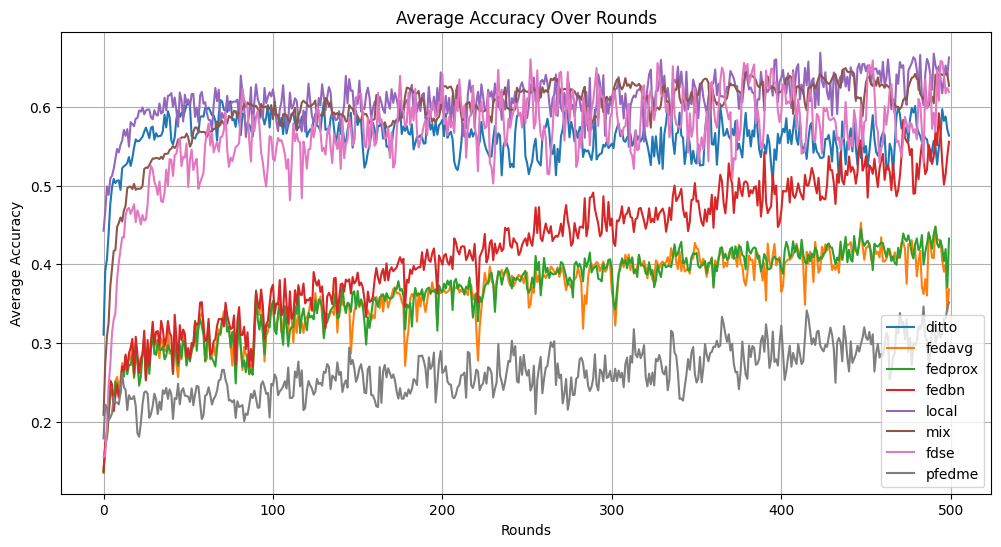

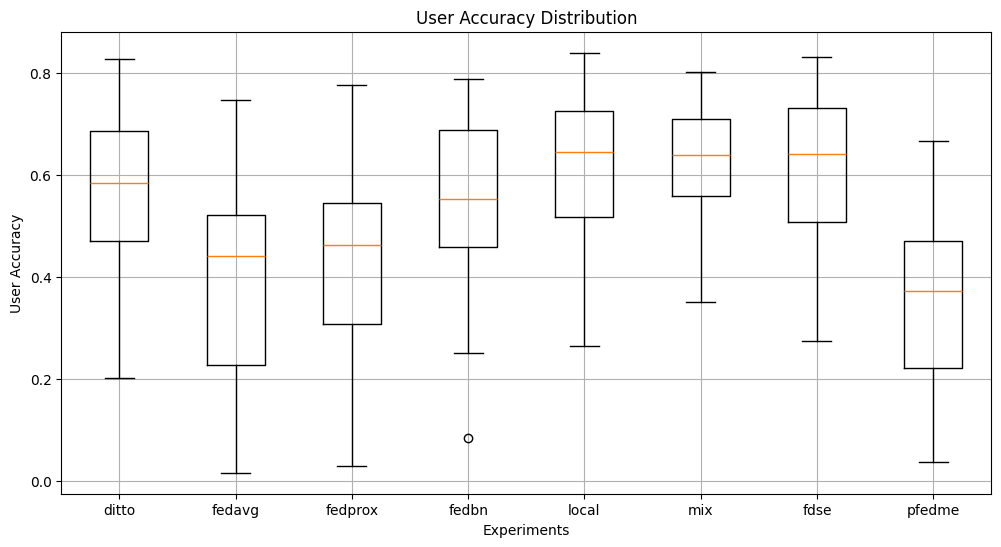

In [5]:
USERS = 40
ROUNDS = 500
exp_paths = {
    "ditto": "exp/ditto_pacs_resnet10_on_pacs_lr0.01_lstep1", 
    "fedavg": "exp/fedavg_pacs_resnet10_on_pacs_lr0.01_lstep1",
    "fedprox": "exp/fedprox_pacs_resnet10_on_pacs_lr0.01_lstep1",
    "fedbn": "exp/fedavg_pacs_resnet10_on_pacs_lr0.01_lstep1/sub_exp_20250815040230",
    "local": "exp/local_pacs_resnet10_on_pacs_lr0.01_lstep1",
    "mix": "exp/mix_pacs_resnet10_on_pacs_lr0.01_lstep1",
    "fdse": "exp/fdse_fdse_resnet10_on_pacs_lr0.01_lstep1",
    "pfedme": "exp/PFedMe_pacs_resnet10_on_pacs_lr0.01_lstep1"
}
exp_acc_for_users = {}
exp_acc_for_rounds = {}
for exp_name, exp_path in exp_paths.items():
    print(f"Processing experiment: {exp_name} at {exp_path}")
    acc_list = get_acc_list(f"{exp_path}/eval_results.log", USERS)
    avg_acc_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS)
    exp_acc_for_users[exp_name] = acc_list
    exp_acc_for_rounds[exp_name] = avg_acc_list
plot_avg_accuracy(exp_acc_for_rounds)
plot_user_accuracy(exp_acc_for_users)

Processing experiment: ditto at exp/ditto_office_caltech_alexnet_on_office_caltech_lr0.01_lstep1
["{'Role': 'Client #1', 'Round': 500, 'Results_raw': {'test_avg_loss': 1.583567727596388, 'test_total': 109, 'test_loss': 172.6088823080063, 'test_correct': 52.0, 'test_acc': 0.47706422018348627}}\n", "{'Role': 'Client #2', 'Round': 500, 'Results_raw': {'test_avg_loss': 1.5890398686673461, 'test_total': 119, 'test_loss': 189.09574437141418, 'test_correct': 55.0, 'test_acc': 0.46218487394957986}}\n", "{'Role': 'Client #3', 'Round': 500, 'Results_raw': {'test_avg_loss': 1.821347141265869, 'test_total': 80, 'test_loss': 145.70777130126953, 'test_correct': 23.0, 'test_acc': 0.2875}}\n", "{'Role': 'Client #4', 'Round': 500, 'Results_raw': {'test_avg_loss': 1.7774086983307549, 'test_total': 69, 'test_loss': 122.64120018482208, 'test_correct': 31.0, 'test_acc': 0.4492753623188406}}\n", "{'Role': 'Client #5', 'Round': 500, 'Results_raw': {'test_avg_loss': 1.7564181277626438, 'test_total': 76, 'test

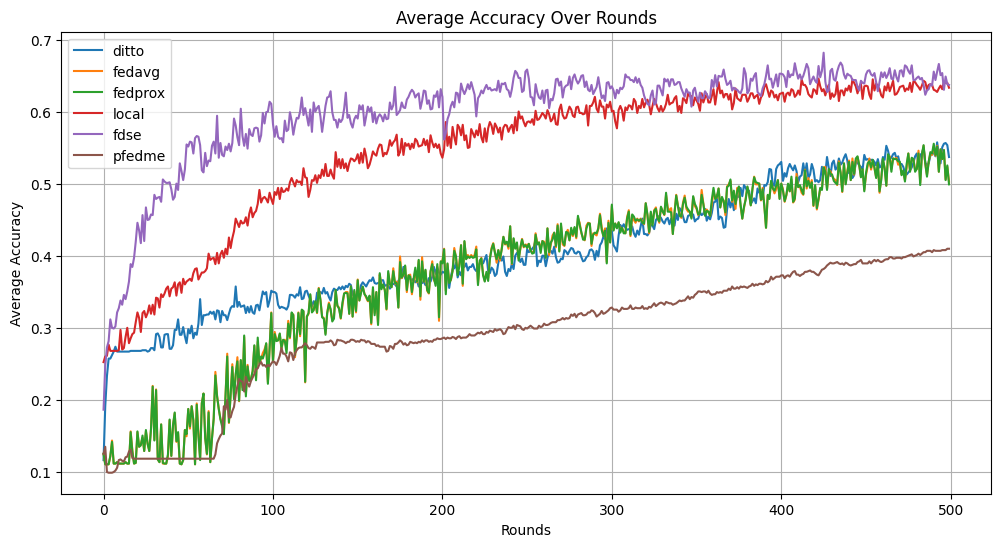

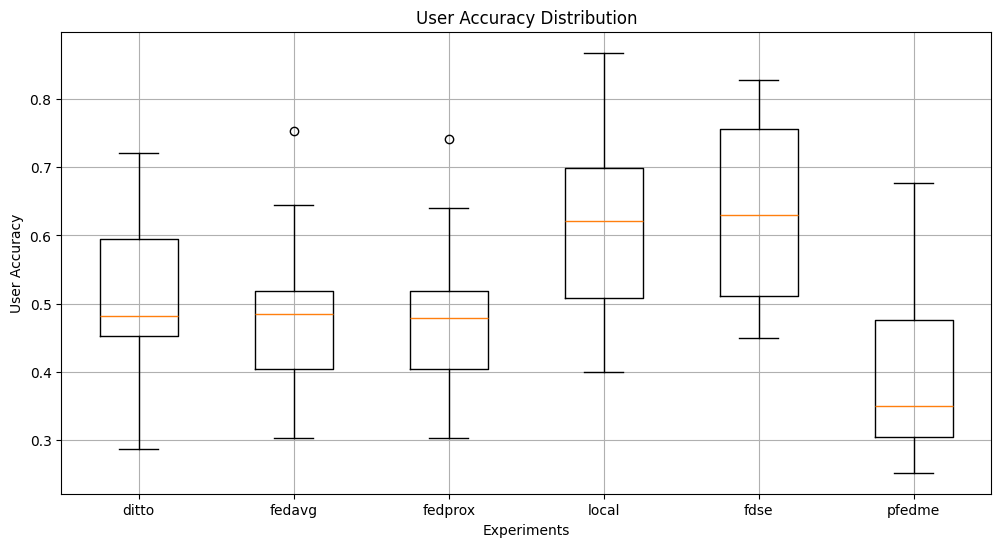

In [6]:
USERS = 10
ROUNDS = 500
exp_paths = {
    "ditto": "exp/ditto_office_caltech_alexnet_on_office_caltech_lr0.01_lstep1", 
    "fedavg": "exp/fedavg_office_caltech_alexnet_on_office_caltech_lr0.01_lstep1",
    "fedprox": "exp/fedprox_office_caltech_alexnet_on_office_caltech_lr0.01_lstep1",
    "local": "exp/local_office_caltech_alexnet_on_office_caltech_lr0.01_lstep1",
    # "mix": "exp/mix_office_caltech_alexnet_on_office_caltech_lr0.01_lstep1",
    "fdse": "exp/fdse_fdse_alexnet_on_office_caltech_lr0.01_lstep1",
    "pfedme": "exp/PFedMe_office_caltech_alexnet_on_office_caltech_lr0.01_lstep1"
}
exp_acc_for_users = {}
exp_acc_for_rounds = {}
for exp_name, exp_path in exp_paths.items():
    print(f"Processing experiment: {exp_name} at {exp_path}")
    acc_list = get_acc_list(f"{exp_path}/eval_results.log", USERS)
    avg_acc_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS)
    exp_acc_for_users[exp_name] = acc_list
    exp_acc_for_rounds[exp_name] = avg_acc_list
plot_avg_accuracy(exp_acc_for_rounds)
plot_user_accuracy(exp_acc_for_users)

In [ ]:
# 2020.06.09-Changed for building GhostNet
#            Huawei Technologies Co., Ltd. <foss@huawei.com>
"""
Creates a GhostNet Model as defined in:
GhostNet: More Features from Cheap Operations By Kai Han, Yunhe Wang, Qi Tian, Jianyuan Guo, Chunjing Xu, Chang Xu.
https://arxiv.org/abs/1911.11907
Modified from https://github.com/d-li14/mobilenetv3.pytorch and https://github.com/rwightman/pytorch-image-models
"""
import torch
import torch.nn as nn
import torch.nn.functional as F
import math


__all__ = ['ghost_net']


def _make_divisible(v, divisor, min_value=None):
    """
    This function is taken from the original tf repo.
    It ensures that all layers have a channel number that is divisible by 8
    It can be seen here:
    https://github.com/tensorflow/models/blob/master/research/slim/nets/mobilenet/mobilenet.py
    """
    if min_value is None:
        min_value = divisor
    new_v = max(min_value, int(v + divisor / 2) // divisor * divisor)
    # Make sure that round down does not go down by more than 10%.
    if new_v < 0.9 * v:
        new_v += divisor
    return new_v


def hard_sigmoid(x, inplace: bool = False):
    if inplace:
        return x.add_(3.).clamp_(0., 6.).div_(6.)
    else:
        return F.relu6(x + 3.) / 6.


class SqueezeExcite(nn.Module):
    def __init__(self, in_chs, se_ratio=0.25, reduced_base_chs=None,
                 act_layer=nn.ReLU, gate_fn=hard_sigmoid, divisor=4, **_):
        super(SqueezeExcite, self).__init__()
        self.gate_fn = gate_fn
        reduced_chs = _make_divisible((reduced_base_chs or in_chs) * se_ratio, divisor)
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.conv_reduce = nn.Conv2d(in_chs, reduced_chs, 1, bias=True)
        self.act1 = act_layer(inplace=True)
        self.conv_expand = nn.Conv2d(reduced_chs, in_chs, 1, bias=True)

    def forward(self, x):
        x_se = self.avg_pool(x)
        x_se = self.conv_reduce(x_se)
        x_se = self.act1(x_se)
        x_se = self.conv_expand(x_se)
        x = x * self.gate_fn(x_se)
        return x    

    
class ConvBnAct(nn.Module):
    def __init__(self, in_chs, out_chs, kernel_size,
                 stride=1, act_layer=nn.ReLU):
        super(ConvBnAct, self).__init__()
        self.conv = nn.Conv2d(in_chs, out_chs, kernel_size, stride, kernel_size//2, bias=False)
        self.bn1 = nn.BatchNorm2d(out_chs)
        self.act1 = act_layer(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn1(x)
        x = self.act1(x)
        return x


class GhostModule(nn.Module):
    def __init__(self, inp, oup, kernel_size=1, ratio=2, dw_size=3, stride=1, relu=True):
        super(GhostModule, self).__init__()
        self.oup = oup
        init_channels = math.ceil(oup / ratio)
        new_channels = init_channels*(ratio-1)

        self.primary_conv = nn.Sequential(
            nn.Conv2d(inp, init_channels, kernel_size, stride, kernel_size//2, bias=False),
            nn.BatchNorm2d(init_channels),
            nn.ReLU(inplace=True) if relu else nn.Sequential(),
        )

        self.cheap_operation = nn.Sequential(
            nn.Conv2d(init_channels, new_channels, dw_size, 1, dw_size//2, groups=init_channels, bias=False),
            nn.BatchNorm2d(new_channels),
            nn.ReLU(inplace=True) if relu else nn.Sequential(),
        )

    def forward(self, x):
        x1 = self.primary_conv(x)
        x2 = self.cheap_operation(x1)
        out = torch.cat([x1,x2], dim=1)
        return out[:,:self.oup,:,:]


class GhostBottleneck(nn.Module):
    """ Ghost bottleneck w/ optional SE"""

    def __init__(self, in_chs, mid_chs, out_chs, dw_kernel_size=3,
                 stride=1, act_layer=nn.ReLU, se_ratio=0.):
        super(GhostBottleneck, self).__init__()
        has_se = se_ratio is not None and se_ratio > 0.
        self.stride = stride

        # Point-wise expansion
        self.ghost1 = GhostModule(in_chs, mid_chs, relu=True)

        # Depth-wise convolution
        if self.stride > 1:
            self.conv_dw = nn.Conv2d(mid_chs, mid_chs, dw_kernel_size, stride=stride,
                             padding=(dw_kernel_size-1)//2,
                             groups=mid_chs, bias=False)
            self.bn_dw = nn.BatchNorm2d(mid_chs)

        # Squeeze-and-excitation
        if has_se:
            self.se = SqueezeExcite(mid_chs, se_ratio=se_ratio)
        else:
            self.se = None

        # Point-wise linear projection
        self.ghost2 = GhostModule(mid_chs, out_chs, relu=False)
        
        # shortcut
        if (in_chs == out_chs and self.stride == 1):
            self.shortcut = nn.Sequential()
        else:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_chs, in_chs, dw_kernel_size, stride=stride,
                       padding=(dw_kernel_size-1)//2, groups=in_chs, bias=False),
                nn.BatchNorm2d(in_chs),
                nn.Conv2d(in_chs, out_chs, 1, stride=1, padding=0, bias=False),
                nn.BatchNorm2d(out_chs),
            )


    def forward(self, x):
        residual = x

        # 1st ghost bottleneck
        x = self.ghost1(x)

        # Depth-wise convolution
        if self.stride > 1:
            x = self.conv_dw(x)
            x = self.bn_dw(x)

        # Squeeze-and-excitation
        if self.se is not None:
            x = self.se(x)

        # 2nd ghost bottleneck
        x = self.ghost2(x)
        
        x += self.shortcut(residual)
        return x


class GhostNet(nn.Module):
    def __init__(self, cfgs, num_classes=1000, width=1.0, dropout=0.2):
        super(GhostNet, self).__init__()
        # setting of inverted residual blocks
        self.cfgs = cfgs
        self.dropout = dropout

        # building first layer
        output_channel = _make_divisible(16 * width, 4)
        self.conv_stem = nn.Conv2d(3, output_channel, 3, 2, 1, bias=False)
        self.bn1 = nn.BatchNorm2d(output_channel)
        self.act1 = nn.ReLU(inplace=True)
        input_channel = output_channel

        # building inverted residual blocks
        stages = []
        block = GhostBottleneck
        for cfg in self.cfgs:
            layers = []
            for k, exp_size, c, se_ratio, s in cfg:
                output_channel = _make_divisible(c * width, 4)
                hidden_channel = _make_divisible(exp_size * width, 4)
                layers.append(block(input_channel, hidden_channel, output_channel, k, s,
                              se_ratio=se_ratio))
                input_channel = output_channel
            stages.append(nn.Sequential(*layers))

        output_channel = _make_divisible(exp_size * width, 4)
        stages.append(nn.Sequential(ConvBnAct(input_channel, output_channel, 1)))
        input_channel = output_channel
        
        self.blocks = nn.Sequential(*stages)        

        # building last several layers
        output_channel = 1280
        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.conv_head = nn.Conv2d(input_channel, output_channel, 1, 1, 0, bias=True)
        self.act2 = nn.ReLU(inplace=True)
        self.classifier = nn.Linear(output_channel, num_classes)

    def forward(self, x):
        x = self.conv_stem(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.blocks(x)
        x = self.global_pool(x)
        x = self.conv_head(x)
        x = self.act2(x)
        x = x.view(x.size(0), -1)
        if self.dropout > 0.:
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.classifier(x)
        return x


def ghostnet(**kwargs):
    """
    Constructs a GhostNet model
    """
    cfgs = [
        # k, t, c, SE, s 
        # stage1
        [[3,  16,  16, 0, 1]],
        # stage2
        [[3,  48,  24, 0, 2]],
        [[3,  72,  24, 0, 1]],
        # stage3
        [[5,  72,  40, 0.25, 2]],
        [[5, 120,  40, 0.25, 1]],
        # stage4
        [[3, 240,  80, 0, 2]],
        [[3, 200,  80, 0, 1],
         [3, 184,  80, 0, 1],
         [3, 184,  80, 0, 1],
         [3, 480, 112, 0.25, 1],
         [3, 672, 112, 0.25, 1]
        ],
        # stage5
        [[5, 672, 160, 0.25, 2]],
        [[5, 960, 160, 0, 1],
         [5, 960, 160, 0.25, 1],
         [5, 960, 160, 0, 1],
         [5, 960, 160, 0.25, 1]
        ]
    ]
    return GhostNet(cfgs, **kwargs)


if __name__=='__main__':
    model = ghostnet()
    model.eval()
    print(model)
    input = torch.randn(32,3,320,256)
    y = model(input)
    print(y.size())